<a href="https://colab.research.google.com/github/Lilian-Moraes/Challenge-TelecomX_BR/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [2]:
url = 'https://raw.githubusercontent.com/Lilian-Moraes/Challenge-TelecomX_BR/refs/heads/main/TelecomX_Data.json'

In [3]:
dados = pd.read_json(url)


In [4]:

dados.to_json('TelecomX_Data.json', orient='records', lines=True) #manter arquivo em upload

In [5]:
dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [7]:
colunas = list(dados.columns)
colunas

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

In [8]:
from pandas import json_normalize

In [9]:
# Desaninhar a coluna 'customer'
customer_df = json_normalize(dados['customer'])
dados = pd.concat([dados, customer_df], axis=1)
dados.drop('customer', axis=1, inplace=True)

In [10]:
# Desaninhar a coluna 'phone'
phone_df = json_normalize(dados['phone'])
dados = pd.concat([dados, phone_df], axis=1)
dados.drop('phone', axis=1, inplace=True)

In [11]:
# Desaninhar a coluna 'internet'
internet_df = json_normalize(dados['internet'])
dados = pd.concat([dados, internet_df], axis=1)
dados.drop('internet', axis=1, inplace=True)

In [12]:
# Desaninhar a coluna 'account'
account_df = json_normalize(dados['account'])
dados = pd.concat([dados, account_df], axis=1)
dados.drop('account', axis=1, inplace=True)

In [13]:
# Exibir as primeiras linhas do DataFrame desaninhado
print("\nPrimeiras linhas do DataFrame desaninhado:")
print(dados.head())


Primeiras linhas do DataFrame desaninhado:
   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes

In [14]:
# Imprimir o dtype de cada coluna
print("\nTipo de dados de cada coluna:")
print(dados.dtypes)


Tipo de dados de cada coluna:
customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total        object
dtype: object


#🔧 Transformação

In [15]:
# 1. Verificar valores ausentes
print("\nValores ausentes por coluna:")
print(dados.isnull().sum())


Valores ausentes por coluna:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


In [16]:
# 2. Verificar linhas duplicadas
print("\nNúmero de linhas duplicadas:"),
print(dados.duplicated().sum())


Número de linhas duplicadas:
0


In [17]:
# 4. Verificar tipos de dados
print("\nTipos de dados por coluna:")
print(dados.dtypes)


Tipos de dados por coluna:
customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total        object
dtype: object


In [18]:
# 5. Verificar inconsistências nas categorias (exemplo com a coluna 'gender')
print("\nValores únicos na coluna 'gender':", dados['gender'].unique())


Valores únicos na coluna 'gender': ['Female' 'Male']


In [19]:
# Identificar colunas categóricas (tipo 'object')
colunas_categoricas = dados.select_dtypes(include=['object']).columns

In [20]:
# Verificar valores únicos em cada coluna categórica
print("\nValores únicos em cada coluna categórica:")
for coluna in colunas_categoricas:
    print(f"\nColuna: {coluna}")
    print(dados[coluna].unique())


Valores únicos em cada coluna categórica:

Coluna: customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Coluna: Churn
['No' 'Yes' '']

Coluna: gender
['Female' 'Male']

Coluna: Partner
['Yes' 'No']

Coluna: Dependents
['Yes' 'No']

Coluna: PhoneService
['Yes' 'No']

Coluna: MultipleLines
['No' 'Yes' 'No phone service']

Coluna: InternetService
['DSL' 'Fiber optic' 'No']

Coluna: OnlineSecurity
['No' 'Yes' 'No internet service']

Coluna: OnlineBackup
['Yes' 'No' 'No internet service']

Coluna: DeviceProtection
['No' 'Yes' 'No internet service']

Coluna: TechSupport
['Yes' 'No' 'No internet service']

Coluna: StreamingTV
['Yes' 'No' 'No internet service']

Coluna: StreamingMovies
['No' 'Yes' 'No internet service']

Coluna: Contract
['One year' 'Month-to-month' 'Two year']

Coluna: PaperlessBilling
['Yes' 'No']

Coluna: PaymentMethod
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']

Coluna: Charges.Tota

In [21]:
# Função para converter para float, lidando com erros
def converter_para_float(valor):

    if isinstance(valor, str):
        valor = valor.strip()  # Remover espaços em branco
        valor = valor.replace(',', '.')  # Substituir vírgula por ponto
        try:
            return float(valor)
        except ValueError:
            return None
    return valor  # Retorna o valor original se não for uma string

In [22]:
# Aplicar a função de conversão à coluna "Charges.Total"
dados['Charges.Total'] = dados['Charges.Total'].apply(converter_para_float)

In [23]:
# Verificar o tipo de dados da coluna após a conversão
print("\nTipo de dados da coluna 'Charges.Total' após a conversão:", dados['Charges.Total'].dtype)


Tipo de dados da coluna 'Charges.Total' após a conversão: float64


In [24]:
print(dados['Charges.Total'].head())

0     593.30
1     542.40
2     280.85
3    1237.85
4     267.40
Name: Charges.Total, dtype: float64


In [25]:
# Converter tenure para int (meses de contrato)
dados['tenure'] = pd.to_numeric(dados['tenure'], errors='coerce')
dados['Charges.Monthly'] = pd.to_numeric(dados['Charges.Monthly'], errors='coerce')

In [26]:
# Criar a coluna "Contas_Diarias"
dados['Contas_Diarias'] = dados['Charges.Total'] / dados['tenure'] / 30

In [27]:
dados['Contas_Diarias'].dtype

dtype('float64')

In [28]:
print(dados['Contas_Diarias'].head())

0    2.197407
1    2.008889
2    2.340417
3    3.173974
4    2.971111
Name: Contas_Diarias, dtype: float64


In [29]:
dados.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.197407
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.008889
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.340417
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.173974
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.971111


In [30]:
# Dicionários de mapeamento para as traduções
map_churn = {'Yes': 'Sim', 'No': 'Não'}
map_gender = {'Female': 'Feminino', 'Male': 'Masculino'}
map_partner = {'Yes': 'Sim', 'No': 'Não'}
map_dependents = {'Yes': 'Sim', 'No': 'Não'}
map_phone_service = {'Yes': 'Sim', 'No': 'Não'}
map_multiple_lines = {'No phone service': 'Sem serviço telefônico', 'No': 'Não', 'Yes': 'Sim'}
map_internet_service = {'DSL': 'DSL', 'Fiber optic': 'Fibra ótica', 'No': 'Não'}
map_online_security = {'No internet service': 'Sem serviço de internet', 'No': 'Não', 'Yes': 'Sim'}
map_online_backup = {'No internet service': 'Sem serviço de internet', 'No': 'Não', 'Yes': 'Sim'}
map_device_protection = {'No internet service': 'Sem serviço de internet', 'No': 'Não', 'Yes': 'Sim'}
map_tech_support = {'No internet service': 'Sem serviço de internet', 'No': 'Não', 'Yes': 'Sim'}
map_streaming_tv =  {'No internet service': 'Sem serviço de internet', 'No': 'Não', 'Yes': 'Sim'}
map_streaming_movies =  {'No internet service': 'Sem serviço de internet', 'No': 'Não', 'Yes': 'Sim'}
map_contract = {'Month-to-month': 'Mês a mês', 'One year': 'Um ano', 'Two year': 'Dois anos'}
map_paperless_billing = {'Yes': 'Sim', 'No': 'Não'}
map_payment_method = {'Electronic check': 'Cheque eletrônico', 'Mailed check': 'Cheque por correio', 'Bank transfer (automatic)': 'Transferência bancária (automática)', 'Credit card (automatic)': 'Cartão de crédito (automático)'}


In [31]:
# Aplicar as traduções
dados['Churn'] = dados['Churn'].replace(map_churn)
dados['gender'] = dados['gender'].replace(map_gender)
dados['Partner'] = dados['Partner'].replace(map_partner)
dados['Dependents'] = dados['Dependents'].replace(map_dependents)
dados['PhoneService'] = dados['PhoneService'].replace(map_phone_service)
dados['MultipleLines'] = dados['MultipleLines'].replace(map_multiple_lines)
dados['InternetService'] = dados['InternetService'].replace(map_internet_service)
dados['OnlineSecurity'] = dados['OnlineSecurity'].replace(map_online_security)
dados['OnlineBackup'] = dados['OnlineBackup'].replace(map_online_backup)
dados['DeviceProtection'] = dados['DeviceProtection'].replace(map_device_protection)
dados['TechSupport'] = dados['TechSupport'].replace(map_tech_support)
dados['StreamingTV'] = dados['StreamingTV'].replace(map_streaming_tv)
dados['StreamingMovies'] = dados['StreamingMovies'].replace(map_streaming_movies)
dados['Contract'] = dados['Contract'].replace(map_contract)
dados['PaperlessBilling'] = dados['PaperlessBilling'].replace(map_paperless_billing)
dados['PaymentMethod'] = dados['PaymentMethod'].replace(map_payment_method)

In [32]:
# Exibir os valores únicos das colunas traduzidas para verificação
print("\nValores únicos após tradução:")
for coluna in ['Churn', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']:
    print(f"\nColuna: {coluna}")
    print(dados[coluna].unique())


Valores únicos após tradução:

Coluna: Churn
['Não' 'Sim' '']

Coluna: gender
['Feminino' 'Masculino']

Coluna: Partner
['Sim' 'Não']

Coluna: Dependents
['Sim' 'Não']

Coluna: PhoneService
['Sim' 'Não']

Coluna: MultipleLines
['Não' 'Sim' 'Sem serviço telefônico']

Coluna: InternetService
['DSL' 'Fibra ótica' 'Não']

Coluna: OnlineSecurity
['Não' 'Sim' 'Sem serviço de internet']

Coluna: OnlineBackup
['Sim' 'Não' 'Sem serviço de internet']

Coluna: DeviceProtection
['Não' 'Sim' 'Sem serviço de internet']

Coluna: TechSupport
['Sim' 'Não' 'Sem serviço de internet']

Coluna: StreamingTV
['Sim' 'Não' 'Sem serviço de internet']

Coluna: StreamingMovies
['Não' 'Sim' 'Sem serviço de internet']

Coluna: Contract
['Um ano' 'Mês a mês' 'Dois anos']

Coluna: PaperlessBilling
['Sim' 'Não']

Coluna: PaymentMethod
['Cheque por correio' 'Cheque eletrônico' 'Cartão de crédito (automático)'
 'Transferência bancária (automática)']


In [33]:
dados.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias
0,0002-ORFBO,Não,Feminino,0,Sim,Sim,9,Sim,Não,DSL,...,Não,Sim,Sim,Não,Um ano,Sim,Cheque por correio,65.6,593.30,2.197407
1,0003-MKNFE,Não,Masculino,0,Não,Não,9,Sim,Sim,DSL,...,Não,Não,Não,Sim,Mês a mês,Não,Cheque por correio,59.9,542.40,2.008889
2,0004-TLHLJ,Sim,Masculino,0,Não,Não,4,Sim,Não,Fibra ótica,...,Sim,Não,Não,Não,Mês a mês,Sim,Cheque eletrônico,73.9,280.85,2.340417
3,0011-IGKFF,Sim,Masculino,1,Sim,Não,13,Sim,Não,Fibra ótica,...,Sim,Não,Sim,Sim,Mês a mês,Sim,Cheque eletrônico,98.0,1237.85,3.173974
4,0013-EXCHZ,Sim,Feminino,1,Sim,Não,3,Sim,Não,Fibra ótica,...,Não,Sim,Sim,Não,Mês a mês,Sim,Cheque por correio,83.9,267.40,2.971111


In [34]:
colunas = list(dados.columns)
colunas

['customerID',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges.Monthly',
 'Charges.Total',
 'Contas_Diarias']

In [35]:
# Dicionário de mapeamento para os nomes das colunas
map_colunas = {
    'customerID': 'ID_Cliente',
    'Churn': 'Cancelamento',
    'gender': 'Gênero',
    'SeniorCitizen': 'Idoso',
    'Partner': 'Parceiro',
    'Dependents': 'Dependentes',
    'tenure': 'Tempo_Contrato',
    'PhoneService': 'Serviço_Telefônico',
    'MultipleLines': 'Múltiplas_Linhas',
    'InternetService': 'Serviço_Internet',
    'OnlineSecurity': 'Segurança_Online',
    'OnlineBackup': 'Backup_Online',
    'DeviceProtection': 'Proteção_Dispositivo',
    'TechSupport': 'Suporte_Técnico',
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_Filmes',
    'Contract': 'Contrato',
    'PaperlessBilling': 'Fatura_Online',
    'PaymentMethod': 'Método_Pagamento',
    'Charges.Monthly': 'Cobranças_Mensais',
    'Charges.Total': 'Cobranças_Totais',
    'Contas_Diarias': 'Contas_Diarias'
}

In [36]:
dados.rename(columns=map_colunas, inplace=True)

In [37]:
print(dados.columns)

Index(['ID_Cliente', 'Cancelamento', 'Gênero', 'Idoso', 'Parceiro',
       'Dependentes', 'Tempo_Contrato', 'Serviço_Telefônico',
       'Múltiplas_Linhas', 'Serviço_Internet', 'Segurança_Online',
       'Backup_Online', 'Proteção_Dispositivo', 'Suporte_Técnico',
       'Streaming_TV', 'Streaming_Filmes', 'Contrato', 'Fatura_Online',
       'Método_Pagamento', 'Cobranças_Mensais', 'Cobranças_Totais',
       'Contas_Diarias'],
      dtype='object')


In [38]:
print("\nValores únicos na coluna 'Cancelamento' antes da limpeza:", dados['Cancelamento'].unique())


Valores únicos na coluna 'Cancelamento' antes da limpeza: ['Não' 'Sim' '']


In [39]:
# Substituir strings vazias por 'Desconhecido'
dados['Cancelamento'] = dados['Cancelamento'].replace('', 'Desconhecido')

In [40]:
# Remover linhas onde a coluna 'Cancelamento' é igual a 'Desconhecido'
dados = dados.drop(dados[dados['Cancelamento'] == 'Desconhecido'].index)

In [41]:
# Exibir os valores únicos para garantir que a limpeza foi eficaz
print("\nValores únicos na coluna 'Cancelamento' após a limpeza:", dados['Cancelamento'].unique())
print("\nContagem de valores na coluna 'Cancelamento' após a limpeza:\n", dados['Cancelamento'].value_counts())


Valores únicos na coluna 'Cancelamento' após a limpeza: ['Não' 'Sim']

Contagem de valores na coluna 'Cancelamento' após a limpeza:
 Cancelamento
Não    5174
Sim    1869
Name: count, dtype: int64


#📊 Carga e análise

In [42]:
dados.describe()

,Idoso,Tempo_Contrato,Cobranças_Mensais,Cobranças_Totais,Contas_Diarias
count,7043.000000,7043.000000,7043.000000,7032.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441,2.159981
std,0.368612,24.559481,30.090047,2266.771362,1.006196
min,0.000000,0.000000,18.250000,18.800000,0.459167
25%,0.000000,9.000000,35.500000,401.450000,1.205996
50%,0.000000,29.000000,70.350000,1397.475000,2.345775
75%,0.000000,55.000000,89.850000,3794.737500,3.005985
max,1.000000,72.000000,118.750000,8684.800000,4.046667


from matplotlib import pyplot as plt
_df_0['Idoso'].plot(kind='hist', bins=20, title='Idoso')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Tempo_Contrato'].plot(kind='hist', bins=20, title='Tempo_Contrato')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Cobranças_Mensais'].plot(kind='hist', bins=20, title='Cobranças_Mensais')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Cobranças_Totais'].plot(kind='hist', bins=20, title='Cobranças_Totais')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Idoso', y='Tempo_Contrato', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Tempo_Contrato', y='Cobranças_Mensais', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Cobranças_Mensais', y='Cobranças_Totais', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Cobranças_Totais', y='Contas_Diarias', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Idoso'].plot(kind='line', figsize=(8, 4), title='Idoso')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Tempo_Contrato'].plot(kind='line', figsize=(8, 4), title='Tempo_Contrato')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Cobranças_Mensais'].plot(kind='line', figsize=(8, 4), title='Cobranças_Mensais')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Cobranças_Totais'].plot(kind='line', figsize=(8, 4), title='Cobranças_Totais')
plt.gca().spines[['top', 'right']].set_visible(False)

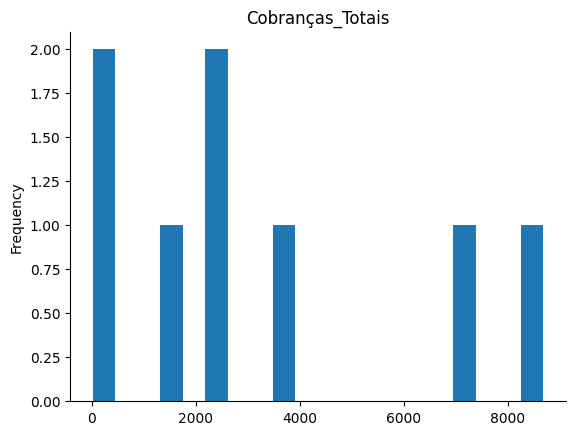

In [54]:
from matplotlib import pyplot as plt
_df_3['Cobranças_Totais'].plot(kind='hist', bins=20, title='Cobranças_Totais')
plt.gca().spines[['top', 'right',]].set_visible(False)

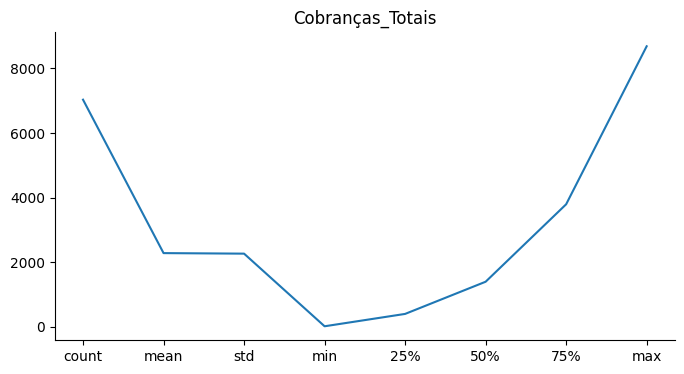

In [53]:
from matplotlib import pyplot as plt
_df_11['Cobranças_Totais'].plot(kind='line', figsize=(8, 4), title='Cobranças_Totais')
plt.gca().spines[['top', 'right']].set_visible(False)

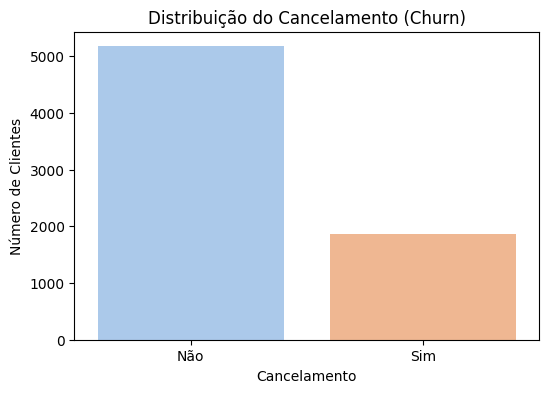

In [43]:
# Distribuição do Churn
plt.figure(figsize=(6, 4))
sns.countplot(x='Cancelamento', data=dados, palette='pastel', hue = "Cancelamento", legend = False)
plt.title('Distribuição do Cancelamento (Churn)')
plt.xlabel('Cancelamento')
plt.ylabel('Número de Clientes')
plt.show()

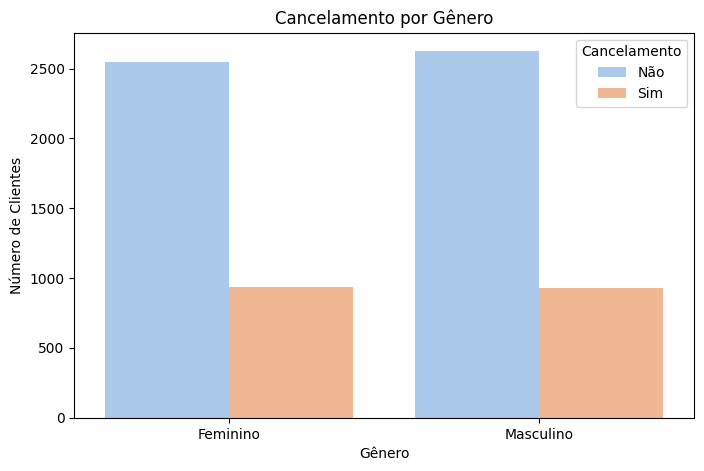

In [44]:
# Churn por Gênero
plt.figure(figsize=(8, 5))
sns.countplot(x='Gênero', hue='Cancelamento', data=dados, palette='pastel')
plt.title('Cancelamento por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Número de Clientes')
plt.legend(title='Cancelamento')
plt.show()

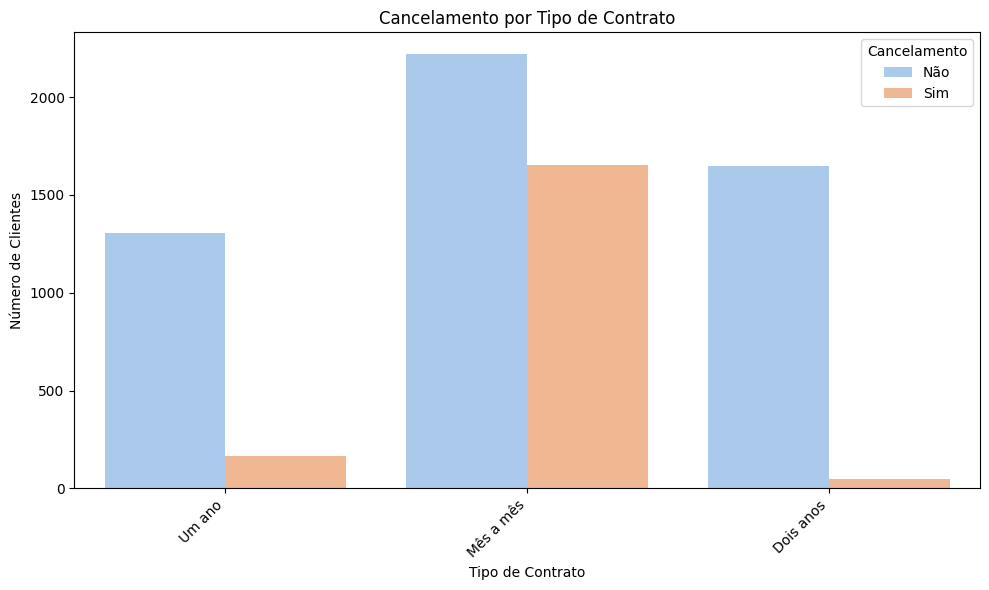

In [45]:
# Churn por Contrato
plt.figure(figsize=(10, 6))
sns.countplot(x='Contrato', hue='Cancelamento', data=dados, palette='pastel')
plt.title('Cancelamento por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cancelamento')
plt.tight_layout()
plt.show()

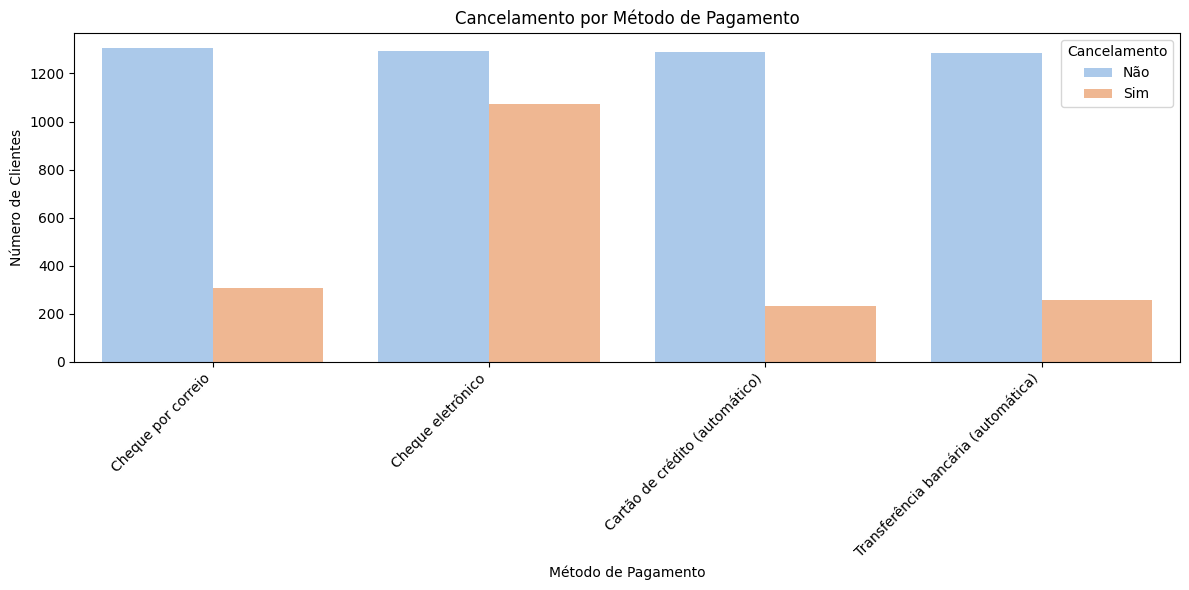

In [46]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Método_Pagamento', hue='Cancelamento', data=dados, palette='pastel')
plt.title('Cancelamento por Método de Pagamento')
plt.xlabel('Método de Pagamento')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cancelamento')
plt.tight_layout()
plt.show()

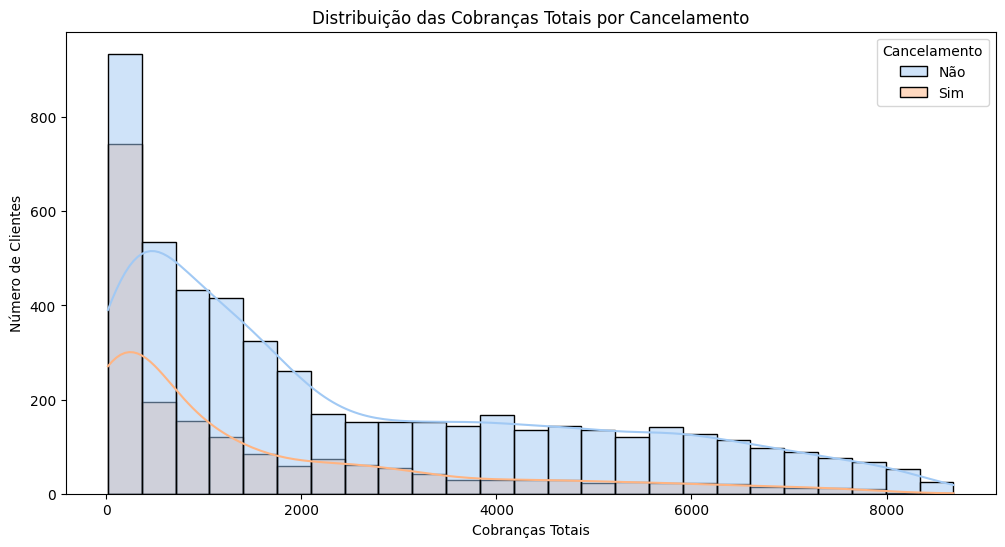

In [47]:
# Distribuição de Cobranças Totais por Cancelamento
plt.figure(figsize=(12, 6))
sns.histplot(data=dados, x='Cobranças_Totais', hue='Cancelamento', kde=True, palette='pastel')
plt.title('Distribuição das Cobranças Totais por Cancelamento')
plt.xlabel('Cobranças Totais')
plt.ylabel('Número de Clientes')
plt.show()

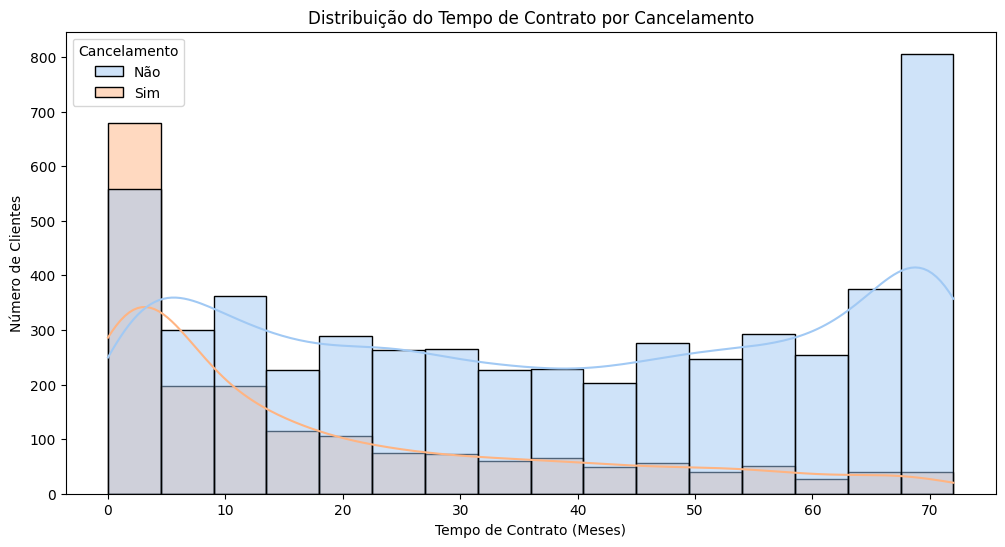

In [48]:
# Distribuição do Tempo de Contrato por Cancelamento
plt.figure(figsize=(12, 6))
sns.histplot(data=dados, x='Tempo_Contrato', hue='Cancelamento', kde=True, palette='pastel')
plt.title('Distribuição do Tempo de Contrato por Cancelamento')
plt.xlabel('Tempo de Contrato (Meses)')
plt.ylabel('Número de Clientes')
plt.show()

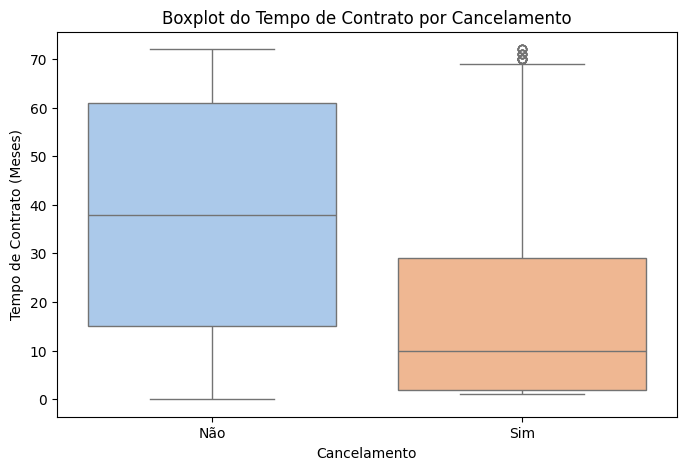

In [49]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Cancelamento', y='Tempo_Contrato', data=dados, palette='pastel', hue = "Cancelamento", legend = False)
plt.title('Boxplot do Tempo de Contrato por Cancelamento')
plt.xlabel('Cancelamento')
plt.ylabel('Tempo de Contrato (Meses)')
plt.show()

In [50]:
fig = px.scatter_3d(
    dados,
    x='Cancelamento',
    y='Cobranças_Mensais',
    z='Cobranças_Totais',
    color='Cancelamento',
    color_discrete_map={'Sim': 'red', 'Não': 'green'},  # Define as cores para o churn
    hover_data=['ID_Cliente'],  # Informações adicionais ao passar o mouse
    title='Relação entre Cancelamento, Cobranças Mensais e Cobranças Totais'
)

fig.show()

In [51]:
# Converter 'Tempo_Contrato' para numérico
dados['Tempo_Contrato'] = pd.to_numeric(dados['Tempo_Contrato'], errors='coerce')

# Agrupar por tempo de contrato e contar os cancelamentos
cancelamentos_por_tempo = dados.groupby(['Tempo_Contrato', 'Cancelamento']).size().reset_index(name='Quantidade')

In [63]:
import plotly.graph_objs as go

# Criar o gráfico de barras interativo com Plotly Express
fig2 = px.bar(cancelamentos_por_tempo,
             x='Tempo_Contrato',
             y='Quantidade',
             color='Cancelamento',
             barmode='group',
             title='Quantidade de Cancelamentos por Tempo de Contrato',
             labels={'Tempo_Contrato': 'Tempo de Contrato (Meses)',
                     'Quantidade': 'Número de Cancelamentos',
                     'Cancelamento': 'Cancelamento'})


fig2.show()

In [72]:
# Análise por categorias
colunas_analise = ['Serviço_Telefônico', 'Múltiplas_Linhas', 'Serviço_Internet', 'Segurança_Online',
                   'Backup_Online', 'Proteção_Dispositivo', 'Suporte_Técnico', 'Streaming_TV',
                   'Streaming_Filmes']

In [73]:
# Percentual geral por cancelamento e categorias
print("Taxa de cancelamento por categoria:\n")
for coluna in colunas_analise:
    print(f"Coluna: {coluna}")

    taxa_cancelamento = dados.groupby(coluna)['Cancelamento'].value_counts(normalize=True).mul(100).rename('Percentual').reset_index()


    print(taxa_cancelamento)

Taxa de cancelamento por categoria:

Coluna: Serviço_Telefônico
  Serviço_Telefônico Cancelamento  Percentual
0                Não          Não   75.073314
1                Não          Sim   24.926686
2                Sim          Não   73.290363
3                Sim          Sim   26.709637
Coluna: Múltiplas_Linhas
         Múltiplas_Linhas Cancelamento  Percentual
0                     Não          Não   74.955752
1                     Não          Sim   25.044248
2  Sem serviço telefônico          Não   75.073314
3  Sem serviço telefônico          Sim   24.926686
4                     Sim          Não   71.390104
5                     Sim          Sim   28.609896
Coluna: Serviço_Internet
  Serviço_Internet Cancelamento  Percentual
0              DSL          Não   81.040892
1              DSL          Sim   18.959108
2      Fibra ótica          Não   58.107235
3      Fibra ótica          Sim   41.892765
4              Não          Não   92.595020
5              Não          Sim    

In [74]:
# Cancelamento por categoria - geral
print("Top 3 taxas de cancelamento quando o serviço é 'Sim':\n")
for coluna in colunas_analise:
    print(f"Coluna: {coluna}")


    dados_filtrados = dados[dados[coluna] == 'Sim']


    taxa_cancelamento = dados_filtrados['Cancelamento'].value_counts(normalize=True).mul(100).rename('Percentual')


    taxa_sim = taxa_cancelamento.get('Sim', 0)

    print(f"Taxa de cancelamento quando {coluna} é 'Sim': {taxa_sim:.2f}%")

    print("\n")

Top 3 taxas de cancelamento quando o serviço é 'Sim':

Coluna: Serviço_Telefônico
Taxa de cancelamento quando Serviço_Telefônico é 'Sim': 26.71%


Coluna: Múltiplas_Linhas
Taxa de cancelamento quando Múltiplas_Linhas é 'Sim': 28.61%


Coluna: Serviço_Internet
Taxa de cancelamento quando Serviço_Internet é 'Sim': 0.00%


Coluna: Segurança_Online
Taxa de cancelamento quando Segurança_Online é 'Sim': 14.61%


Coluna: Backup_Online
Taxa de cancelamento quando Backup_Online é 'Sim': 21.53%


Coluna: Proteção_Dispositivo
Taxa de cancelamento quando Proteção_Dispositivo é 'Sim': 22.50%


Coluna: Suporte_Técnico
Taxa de cancelamento quando Suporte_Técnico é 'Sim': 15.17%


Coluna: Streaming_TV
Taxa de cancelamento quando Streaming_TV é 'Sim': 30.07%


Coluna: Streaming_Filmes
Taxa de cancelamento quando Streaming_Filmes é 'Sim': 29.94%




In [75]:
# Cancelamento por categoria - top 3
print("Top 3 taxas de cancelamento quando o serviço é 'Sim':\n")

#
resultados = []

for coluna in colunas_analise:

    dados_filtrados = dados[dados[coluna] == 'Sim']


    taxa_cancelamento = dados_filtrados['Cancelamento'].value_counts(normalize=True).mul(100).rename('Percentual')
    taxa_sim = taxa_cancelamento.get('Sim', 0)


    resultados.append({'Coluna': coluna, 'Taxa_Sim': taxa_sim})


df_resultados = pd.DataFrame(resultados)


df_resultados = df_resultados.sort_values('Taxa_Sim', ascending=False)


top_3 = df_resultados.head(3)


for index, row in top_3.iterrows():
    print(f"Coluna: {row['Coluna']}")
    print(f" Taxa de cancelamento quando {row['Coluna']} é 'Sim': {row['Taxa_Sim']:.2f}%")
    print("\n")


Top 3 taxas de cancelamento quando o serviço é 'Sim':

Coluna: Streaming_TV
 Taxa de cancelamento quando Streaming_TV é 'Sim': 30.07%


Coluna: Streaming_Filmes
 Taxa de cancelamento quando Streaming_Filmes é 'Sim': 29.94%


Coluna: Múltiplas_Linhas
 Taxa de cancelamento quando Múltiplas_Linhas é 'Sim': 28.61%




<ipython-input-78-c6c810c60526>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




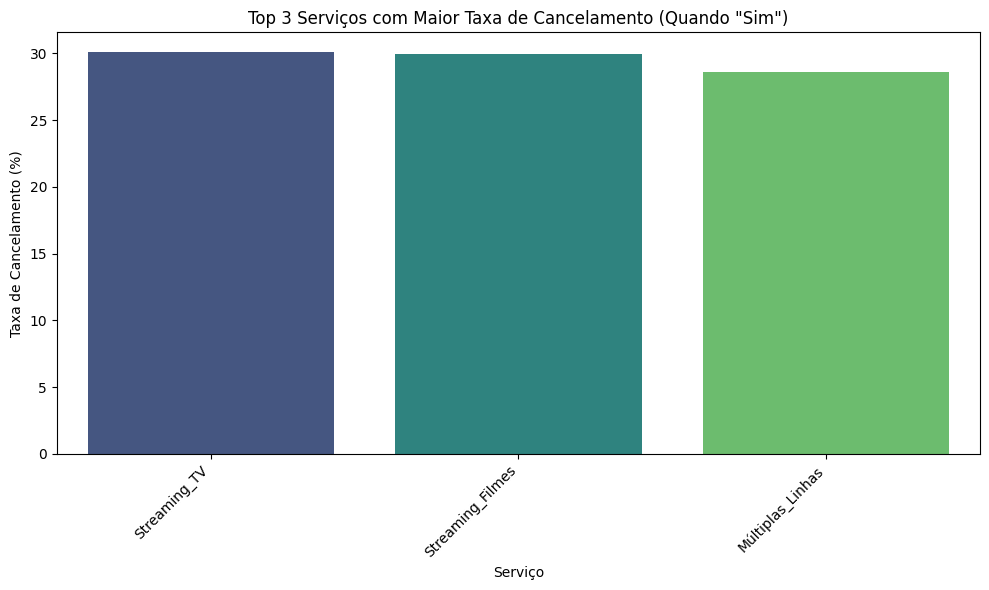

In [78]:
# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Coluna', y='Taxa_Sim', data=top_3, palette='viridis')
plt.title('Top 3 Serviços com Maior Taxa de Cancelamento (Quando "Sim")')
plt.xlabel('Serviço')
plt.ylabel('Taxa de Cancelamento (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [84]:

print("Nomes das colunas do DataFrame top_3:", top_3.columns)


fig3 = px.pie(top_3,
             values='Taxa_Sim',
             names='Coluna',
             title='Top 3 Serviços com Maior Taxa de Cancelamento (Quando "Sim")',
             hover_data=['Taxa_Sim'],
             labels={'Coluna': 'Serviço', 'Taxa_Sim': 'Taxa de Cancelamento (%)'})


fig.update_traces(textposition='inside', textinfo='percent+label')


fig3.show()

Nomes das colunas do DataFrame top_3: Index(['Coluna', 'Taxa_Sim'], dtype='object')


#📄Relatório Final

**Introdução**:
Este desafio tem por objetivo analisar a base de dados do cliente TelecomX, para através dos resultados das análises gerar insights sobre o churn.
Churn: traduzido como evasão, cancelamento, rotatividade de clientes, avalia o que chamamos de retenção de clientes, avalia número de entradas (compras, aquisição) verso cancelamento.



**Limpeza e Tratamento de Dados:** Antes de iniciar as análise, se faz necessário seguir os conceitos da ETL (extração, transformalção e carga) para a devida importação da base de dados em uma IDE, nesta caso o Google Colab, então iniciamos, o que chamamos EDA (análise exploratória de dados), realizado tratamento dos dados nulos, duplicados, aninhados, traduzidos para o Português, transformados tipo object para float e int para melhor análise estatística e gráfica



**Análise exploratória de dados:**

**Análise estatística - médias: **
```
# Tempo de contrato em meses: 32.371  
# Valor de cobrança totais: R$ 64.761
# Valor de cobranças totais de serviços: R$ 2283.300
# valor de contas diárias: R$ 2.159
```

In [62]:
dados.describe(percentiles=[0.25, 0.5, 0.75])

,Idoso,Tempo_Contrato,Cobranças_Mensais,Cobranças_Totais,Contas_Diarias
count,7043.000000,7043.000000,7043.000000,7032.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441,2.159981
std,0.368612,24.559481,30.090047,2266.771362,1.006196
min,0.000000,0.000000,18.250000,18.800000,0.459167
25%,0.000000,9.000000,35.500000,401.450000,1.205996
50%,0.000000,29.000000,70.350000,1397.475000,2.345775
75%,0.000000,55.000000,89.850000,3794.737500,3.005985
max,1.000000,72.000000,118.750000,8684.800000,4.046667


**Análise de Churn: tempo de contrato x cancelamento **

In [64]:
fig2.show()

Pelo gráfico vemos churn mais expressivo em contratos novos, entre 1 a 5 meses iniciais, o que pode indicar:
alinhamento deficiente entre expectiva e entrega de valor, falha

> Alinhamento deficiente entre expectiva e entrega de valor


> Atendimento ao cliente está ruim, demora na resposta ou sem resolução







Analisando os três serviços com maior taxa de cancelamento temos: Streaming de TV e de filme e linhas múltiplas (telefone)



> Serviços de streaming possuem grande concorrência, neste caso necessário avaliar preço e qualidade de atendimento em relação a concorrência



In [85]:
fig3.show()

**Conclusões e Insights:** Maiores informações como tipo de assinaturas, valor dos produtos, análise de benchmark nos dariam maiores argumentos para análises mais profundas do porquê um churn alto nos meses iniciais de aquisição e dos produtos de alto consumo de mercado.



**Ações sugeridas para mapeamento de melhorias:**


> Avaliar possibilidade (financeira, jurídica e operacional) de assinatura anual


> Avaliar com time comercial pós-vendas plano de ação de retenção dos clientes


> Avaliar com time comercial e financeiro benchmark para análise dos valores dos concorrentes


> Mapear reclamações no setor de atendimento e promover plano de ação para resoluções mais ágeis







